<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/pyprobml_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation of the python probabilistic machine learning codebase
This notebook imports all the libraries we will need. Other notebooks may only use a subset of these.

**Make sure you select 'GPU' from the 'Runtime' tab at the top of this page.**

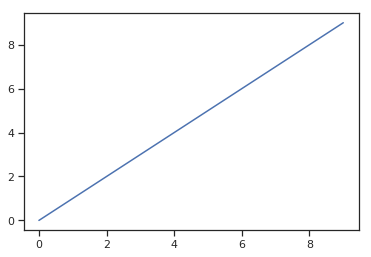

In [0]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
np.set_printoptions(precision=3)
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

import sklearn

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

# Check we can plot stuff
plt.figure()
plt.plot(range(10))

In [0]:
# Tensorflow 2.0
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
import tensorflow_probability as tfp

print("tf version {}".format(tf.__version__))
if tf.test.is_gpu_available():
    print(tf.test.gpu_device_name())
else:
    print("TF cannot find GPU")

TensorFlow 2.x selected.
tf version 2.0.0-beta1
/device:GPU:0


In [0]:
# Pytorch
import torch
import torchvision
print("torch version {}".format(torch.__version__))
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("Torch cannot find GPU")

torch version 1.1.0
Tesla T4


In [0]:
# JAX (https://github.com/google/jax)
!pip install --upgrade -q https://storage.googleapis.com/jax-releases/cuda$(echo $CUDA_VERSION | sed -e 's/\.//' -e 's/\..*//')/jaxlib-$(pip search jaxlib | grep -oP '[0-9\.]+' | head -n 1)-cp36-none-linux_x86_64.whl
!pip install --upgrade -q jax

# Check we can use it
import jax.numpy as jnp
A = jnp.zeros((3,3))

     |████████████████████████████████| 47.4MB 1.2MB/s 
     |████████████████████████████████| 215kB 3.1MB/s 
     |████████████████████████████████| 61kB 31.9MB/s 


In [0]:
# PyProbML files (data, scripts, etc)
!rm -rf pyprobml # Run this first if the pyprobml directory already exists
!git clone https://github.com/probml/pyprobml.git

# Check we can access scripts and any functions they define
os.chdir('pyprobml/scripts')
import pyprobml_utils as pml
pml.pyprobml_test()


# Check we can read a datafile (we assume we have chdir to inside scripts dir)
!ls '../data'
datadir = '../data'
import re
fname = os.path.join(datadir, 'timemachine.txt')
with open(fname, 'r') as f:
    lines = f.readlines()
    sentences = [re.sub('[^A-Za-z]+', ' ', st).lower().split()
                   for st in lines]
sentences[:2]

Cloning into 'pyprobml'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 2173 (delta 157), reused 155 (delta 63), pack-reused 1879
Receiving objects: 100% (2173/2173), 49.66 MiB | 41.79 MiB/s, done.
Resolving deltas: 100% (1040/1040), done.
welcome to python probabilistic ML library
20news_w100.mat        goog.npy       mpg.csv	       timemachine.txt
bread.jpg	       heightWeight   prostate	       XwindowsDocData.mat
clown.png	       knnClassify3c  sachsCtsHTF.txt
collegeAdmissions.csv  mnistAll.mat   sat
CRX_REF_R1_8mers.txt   moteData       SP500.csv


[['the', 'time', 'machine', 'by', 'h', 'g', 'wells'], []]

In [0]:
# We make some wrappers around random number generation
# so it works even if we switch from numpy to JAX
import numpy as onp # original numpy

def set_seed(seed):
    onp.random.seed(seed)
    
def randn(*args):
    return onp.random.randn(*args)
        
def randperm(args):
    return onp.random.permutation(args)